시작하자

In [63]:

import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns #시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import calendar 
from datetime import datetime

import os
print(os.listdir("./input"))

['sampleSubmission.csv', 'test.csv', 'train.csv']


In [64]:
#훈련데이터와 테스트 데이터 세트를 불러온다
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [66]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [67]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [68]:

train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [69]:
# datetime을 년,월,일,시 값으로 나누어서 확인
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
train['day'] = train.datetime.dt.day
train['hour'] = train.datetime.dt.hour
train['dayofweek'] = train.datetime.dt.dayofweek

test['year'] = test.datetime.dt.year
test['month'] =test.datetime.dt.month
test['day'] = test.datetime.dt.day
test['hour'] = test.datetime.dt.hour
test['dayofweek'] = test.datetime.dt.dayofweek

In [70]:
# datetime 값에서 얻을수 있는거 다 얻었으니 지운다
train = train.drop('datetime',axis=1)
test = test.drop('datetime',axis=1)

In [71]:
# windspeed에 0 값이 많다 삭제하자
train = train.drop('windspeed',axis=1)
test = test.drop('windspeed',axis=1)

In [72]:
# casual, registered 날리자
train = train.drop('casual',axis=1)
train = train.drop('registered',axis=1)

In [73]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,1,2011,1,1,4,5


In [74]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,month,day,hour,dayofweek
0,1,0,1,1,10.66,11.365,56,2011,1,20,0,3
1,1,0,1,1,10.66,13.635,56,2011,1,20,1,3
2,1,0,1,1,10.66,13.635,56,2011,1,20,2,3
3,1,0,1,1,10.66,12.880,56,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,2011,1,20,4,3


모델 평가

In [75]:
# y is predict value y_ is actual value
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y), 
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [77]:
from sklearn.model_selection import train_test_split
target = train['count']
features = train.drop(columns=['count'])
train_input, test_input, train_target, test_target = train_test_split(
    features,target, random_state=42
)

train_target_log=np.log1p(train_target)
test_target_log = np.log1p(test_target)

선형회귀

In [78]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
lr = LinearRegression()

lr.fit(train_input,train_target_log)
print(lr.score(train_input,train_target_log))
print(lr.score(test_input,test_target_log))
# 성능평가
pred = lr.predict(test_input)
print(rmsle(np.exp(test_target_log),np.exp(pred),False))

0.4897471682664274
0.4790748778123245
0.983621968597669


In [80]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()

gb.fit(train_input,train_target_log)
print(gb.score(train_input,train_target_log))
print(gb.score(test_input,test_target_log))
preds = gb.predict(train_input)
print('RMSLE Value for GradientBoosting {}'.format(rmsle(np.exp(train_target_log),np.exp(preds),False)))

0.9268600469306323
0.9237898735865724
RMSLE Value for GradientBoosting 0.36655090506609206


(2722, 12)

In [89]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(train_input,train_target_log)
print(rf.score(train_input,train_target_log))
print(rf.score(test_input,test_target_log))
preds = rf.predict(test_input)
print('RMSLE Value for RandomForest {}'.format(rmsle(np.exp(test_target_log),np.exp(preds),False)))

0.9935377964092412
0.9578200509471294
RMSLE Value for RandomForest 0.27311414964718617


In [102]:
# RandomForestRegressor
preds_rf = rf.predict(test)
# 다시 지수로 바꾸기
test_target_exp = np.exp(test_target_log)
preds_rf_exp = np.exp(preds_rf)
# evaluate_regr(test_target_exp,pred_exp)

preds_rf_exp

array([ 14.85158245,   6.13300373,   4.95842882, ..., 124.63063704,
       104.35070448,  62.13867536])

<AxesSubplot:ylabel='Density'>

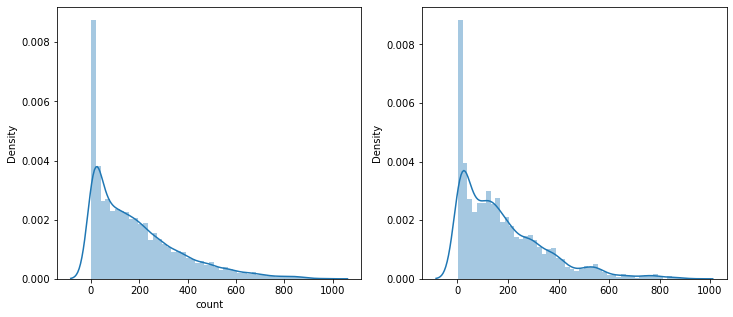

In [107]:
predsTest = rf.predict(test)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(target,ax=ax1,bins=50)
sns.distplot(preds_rf_exp,ax=ax2,bins=50)

((6493,), (8164, 12))

In [103]:
submit = pd.read_csv("./input/sampleSubmission.csv")
submit['count'] = preds_rf_exp
submit.to_csv("./results_rf.csv",index=False)

0.44136점 757등 23.35%